In [9]:
import numpy as np
import pandas as pd

# Load original dataset
- dataset can be obtained from https://grouplens.org/datasets/movielens/25m/
- place `ratings.csv` in `./data/` folder

In [ ]:
DATA_FOLDER = "./data/"

In [10]:
ratings = pd.read_csv(DATA_FOLDER + "ratings.csv")

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [12]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit = "s")

- rename `movieId` to `item_id`

In [16]:
ratings = ratings.rename(columns={"movieId": "item_id"})

In [17]:
ratings.sort_values(["userId","timestamp"], inplace=True)
ratings

,userId,item_id,rating,timestamp,datetime,sessionId
36,1,5952,4.0,1147868053,2006-05-17 12:14:13,1
13,1,2012,2.5,1147868068,2006-05-17 12:14:28,1
12,1,2011,2.5,1147868079,2006-05-17 12:14:39,1
11,1,1653,4.0,1147868097,2006-05-17 12:14:57,1
9,1,1250,4.0,1147868414,2006-05-17 12:20:14,1
...,...,...,...,...,...,...
24999971,162541,1259,4.5,1240953609,2009-04-28 21:20:09,1
24999972,162541,1266,5.0,1240953613,2009-04-28 21:20:13,1
24999982,162541,1556,1.0,1240953650,2009-04-28 21:20:50,1
24999925,162541,293,4.0,1240953789,2009-04-28 21:23:09,1


In [14]:
ratings["sessionId"] = 1

<AxesSubplot:xlabel='datetime', ylabel='Count'>

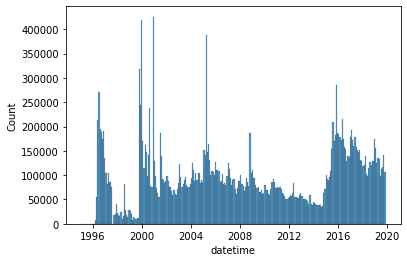

In [15]:
import seaborn as sns
sns.histplot(ratings["datetime"])

### Limit to only recent data (2015+)

In [19]:
ratings_recent = ratings.loc[ratings["datetime"] >= np.datetime64('2015', 'Y')]
ratings_recent.shape

(7563741, 6)

In [20]:
len(ratings_recent.item_id.unique()),len(ratings_recent.userId.unique())

(58133, 45450)

### Make data session-based
- add new session if a gap of at least 24 hours occured between consecutive records for particular user

In [21]:
#takes a couple minutes to complete
sessionBound = 86400 # one day
i=0
for u in ratings_recent.userId.unique():
    i = i+1
    r_u = ratings_recent.loc[ratings_recent.userId == u]
    
    n_time = r_u['timestamp'].to_numpy()    
    sessIncrease = np.ediff1d(n_time, to_begin=0) > sessionBound
    sessNo = np.cumsum(sessIncrease) +1
    
    ratings_recent.loc[r_u.index, "sessionId"] = sessNo
    
    if i % 50 == 0:
        print(i)
        #break
ratings_recent

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150
1

,userId,item_id,rating,timestamp,datetime,sessionId
266,3,356,4.0,1439472199,2015-08-13 13:23:19,1
272,3,593,4.0,1439472203,2015-08-13 13:23:23,1
298,3,1270,3.5,1439472211,2015-08-13 13:23:31,1
254,3,1,4.0,1439472215,2015-08-13 13:23:35,1
268,3,480,2.0,1439472219,2015-08-13 13:23:39,1
...,...,...,...,...,...,...
24999729,162538,49286,4.5,1438785469,2015-08-05 14:37:49,1
24999768,162538,102407,3.5,1438785482,2015-08-05 14:38:02,1
24999715,162538,8533,5.0,1438785506,2015-08-05 14:38:26,1
24999762,162538,93988,4.5,1438785545,2015-08-05 14:39:05,1


In [22]:
countData = ratings_recent.groupby(["userId","sessionId"])[["rating"]].count()
countData

rating
userId sessionId        
3      1             402
       2              26
       3              64
       4               9
       5             155
...                  ...
162534 15              1
162536 1              73
       2               5
       3               1
162538 1             154

[374012 rows x 1 columns]

In [23]:
#mean number of items in a session with the given Id (i.e., less items in later sessions)
countData.reset_index().groupby("sessionId")[["rating"]].mean()

,rating
sessionId,
1,111.570385
2,33.615300
3,20.096147
4,15.160315
5,12.306873
...,...
665,5.000000
666,1.000000
667,10.000000


In [24]:
# average volume of sessions per user
(countData.reset_index().groupby("userId")["sessionId"].count()).mean()

8.229086908690869

## Data binarization
- ratings < 2.5 are negative (-1), ratings > 3.5 are positive (+1); remove middle ones
- for testing, identify user-session pairs where there is at least three positive and three negative rating

In [25]:
df = ratings_recent.loc[~((ratings_recent.rating >=2.5)&(ratings_recent.rating <=3.5)) ]
df.shape

(4644545, 6)

In [26]:
df.loc[df.rating <2.5,"rating"] = -1
df.loc[df.rating >3.5,"rating"] = 1
df

,userId,item_id,rating,timestamp,datetime,sessionId
266,3,356,1.0,1439472199,2015-08-13 13:23:19,1
272,3,593,1.0,1439472203,2015-08-13 13:23:23,1
254,3,1,1.0,1439472215,2015-08-13 13:23:35,1
268,3,480,-1.0,1439472219,2015-08-13 13:23:39,1
317,3,2571,1.0,1439472221,2015-08-13 13:23:41,1
...,...,...,...,...,...,...
24999746,162538,69757,1.0,1438785456,2015-08-05 14:37:36,1
24999729,162538,49286,1.0,1438785469,2015-08-05 14:37:49,1
24999715,162538,8533,1.0,1438785506,2015-08-05 14:38:26,1
24999762,162538,93988,1.0,1438785545,2015-08-05 14:39:05,1


In [27]:
# create a user_session identifier
df = df.copy()
df['user_session_id'] = (df['userId'].astype(str) + '_' + df['sessionId'].astype(str)).map(hash)
df = df.sort_values(by=['user_session_id', 'timestamp'])

### Define sessions suitable for testing

In [28]:
testable_sessions = df.groupby('user_session_id').agg({"userId": "first", "rating": "count"}).rename(columns={"rating": "ratingsCount"}).reset_index()
testable_sessions["positiveCount"] = 0
positive_counts = df[df.rating == 1.].groupby('user_session_id').rating.count()
testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"positiveCount"] = testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"user_session_id"].apply(lambda x: positive_counts[x])
testable_sessions["negativeCount"] = testable_sessions["ratingsCount"] - testable_sessions["positiveCount"]

testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount
0,-9223297441853487232,85983,1,1,0
1,-9223206562003697662,20676,41,35,6
2,-9223107934894440158,131116,1,1,0
3,-9223073729375778310,37621,1,1,0
4,-9223020520282246232,40265,1,0,1
...,...,...,...,...,...
283448,9223035324966486244,126637,1,0,1
283449,9223233107296357023,58933,1,1,0
283450,9223268323420043315,100293,1,1,0
283451,9223297893235091841,95472,160,114,46


In [29]:
print(len(testable_sessions))
# we need at least 3 positive interactions and 3 negative interactions
testable_sessions = testable_sessions[(testable_sessions.positiveCount >= 3) & (testable_sessions.negativeCount >= 3)]
print(len(testable_sessions))

283453
34112


### Distinguish between validation and test sessions

In [30]:
# shuffle rows
testable_sessions = testable_sessions.sample(frac=1).reset_index(drop=True)
# add sessions randomly to validation set (0) or one of five CV splits (1-5)
testable_sessions["split"] = testable_sessions.index.values

split_number_to_string = {
    0: "val",  # 25% of sessions are validation
    1: "test",
    2: "test",
    3: "test",
}

testable_sessions["split"] = testable_sessions["split"].apply(lambda x: x % 4).apply(lambda x: split_number_to_string[x])

In [31]:
testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount,split
0,4373633645275148703,109864,177,73,104,val
1,7917369780558068620,62107,89,79,10,test
2,-5634673786155356481,145718,30,24,6,test
3,-5745251872579673882,108620,57,50,7,test
4,7495048811745973571,88484,39,30,9,val
...,...,...,...,...,...,...
34107,7862865534767884931,136403,77,63,14,test
34108,4490485702452777107,131240,50,47,3,val
34109,3678572265291509658,10570,133,59,74,test
34110,-3449395624888011709,20691,108,89,19,test


In [32]:
# check if every row is a unique user session
assert len(testable_sessions) == testable_sessions.user_session_id.nunique()

In [33]:
for split in ["train", "val", "test"]:
    print(f"number of testable sessions in split {split}: {len(testable_sessions[testable_sessions.split == split])}")

number of testable sessions in split train: 0
number of testable sessions in split val: 8528
number of testable sessions in split test: 25584


In [34]:
# map user_session_id to split
user_session_id_to_split = {usid: split for usid, split in zip(testable_sessions.user_session_id.values, testable_sessions.split.values)}

In [35]:
# assign dataframe entries to split
df["split"] = df["user_session_id"].apply(lambda x: user_session_id_to_split.get(x, "train"))

## Downsample the training data

In [36]:
train_df = df[df.split == "train"]
eval_df = df[df.split != "train"]

# to simulate real-world data sparsity, we subsample rows of train df in a stratified manner (per item)
# we modify the long-tail distribution to make it sparser
# set count x of every item to x**(2/3)
# max count will be 100, and the distribution will be long tailed
print(train_df.item_id.value_counts().describe())
train_df = train_df.groupby('item_id', group_keys=False).apply(
    lambda x: x.sample(
        min(
            round(len(x)**(2/3)), # at most this number
            100,  # at most 100
        ),
    )
)
print(train_df.item_id.value_counts().describe())
# in training split, keep only interactions with (positive) rating 1
train_df = train_df[train_df.rating == 1.]

df = pd.concat([train_df, eval_df])

count    36130.000000
mean        49.365652
std        330.643594
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max      11858.000000
Name: item_id, dtype: float64
count    36130.000000
mean         6.269278
std         14.097070
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        100.000000
Name: item_id, dtype: float64


In [37]:
df.shape

(3049480, 8)

In [40]:
df.groupby("split")["rating"].count()

split
test     2145622
train     188516
val       715342
Name: rating, dtype: int64

## Save processed dataset

In [41]:
df.to_csv("ratings_processed_MovieLens.csv", index=False)